## **Link Video:**

<https://drive.google.com/drive/folders/1a7F6lFDEGwWEoJ6NkuPZC8TTIlLlhv6L?usp=sharing>

# **LIBRARY**

In [161]:
# import libraries
import pandas as pd
import numpy as np
from tqdm import tqdm
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
# model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Model
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import r2_score
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras import regularizers

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from tensorflow import keras
import tensorflow as tf

About dataset
- date: Date of the assessment
- day: Day of the Week
- quarter: The quarter of the year when the data was recorded (e.g., Quarter1, Quarter2)
- Team Code: A unique identifier for the team.
- smv: Standard Minute Value, a measure of the time allocated for a task.
- wip: Work In Progress, the number of products that are unfinished.
- over_time: The amount of overtime worked, measured in minutes.
- incentive: The incentive provided to the workers, measured in USD.
- idle_time: The amount of time workers were idle, measured in minutes.
- idle_men: The number of workers who were idle.
- no_of_style_change: The number of style changes that occurred.
- no_of_workers: The total number of workers.
- productivity_score: The productivity score of the team, measured as a percentage.

# **EDA**

In [162]:
# read
df = pd.read_parquet('dataset_1B.parquet')
df.head()

,date,quarter,day,Team Code,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,productivity_score
0,1/1/2015,Quarter1,Thursday,8,26.16,1108.0,7080,98,0.0,0,0,59.0,94.073
1,1/1/2015,Quarter1,Thursday,1,3.94,NaN,960,0,0.0,0,0,8.0,88.650
2,1/1/2015,Quarter1,Thursday,11,11.41,968.0,3660,50,0.0,0,0,30.5,80.057
3,1/1/2015,Quarter1,Thursday,12,11.41,968.0,3660,50,0.0,0,0,30.5,80.057
4,1/1/2015,Quarter1,Thursday,6,25.90,1170.0,1920,50,0.0,0,0,56.0,80.038


In [163]:
# checking missing values
def check_missing_values(df):
    result = []
    for col in df.columns:
        # count NaN
        nan_count = df[col].isnull().sum()

        # count "NA / white space / None / NULL (string)"
        na_count = (df[col] == "NA").sum()
        empty_count = (df[col] == "").sum()
        other_placeholder_count = (df[col].isin(["None", "NULL"])).sum()

        # total missing values
        total_missing = nan_count + na_count + empty_count + other_placeholder_count

        # percentage misisng values
        total_percentage = (total_missing / len(df)) * 100

        # results
        result.append({
            "Column": col,
            "NaN Count": nan_count,
            "'NA' Count": na_count,
            "Empty Strings Count": empty_count,
            "Other Placeholders Count": other_placeholder_count,
            "Total Missing (%)": total_percentage
        })
    detailed_missing_df = pd.DataFrame(result)

    # sort
    return detailed_missing_df.sort_values(by="Total Missing (%)", ascending=False)

detailed_missing_df = check_missing_values(df)
detailed_missing_df


,Column,NaN Count,'NA' Count,Empty Strings Count,Other Placeholders Count,Total Missing (%)
5,wip,506,0,0,0,42.272348
1,quarter,0,0,0,0,0.000000
2,day,0,0,0,0,0.000000
3,Team Code,0,0,0,0,0.000000
0,date,0,0,0,0,0.000000
4,smv,0,0,0,0,0.000000
6,over_time,0,0,0,0,0.000000
7,incentive,0,0,0,0,0.000000
8,idle_time,0,0,0,0,0.000000
9,idle_men,0,0,0,0,0.000000


## **Check Missing Value and Duplicate**

In [164]:
# dimension of dataset
dim = df.shape
print(f'The dataset has {dim[0]} rows and {dim[1]} columns')

The dataset has 1197 rows and 13 columns


In [165]:
# show header of dataset
df.columns

Index(['date', 'quarter', 'day', 'Team Code', 'smv', 'wip', 'over_time',
       'incentive', 'idle_time', 'idle_men', 'no_of_style_change',
       'no_of_workers', 'productivity_score'],
      dtype='object')

In [166]:
# show info of each the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                1197 non-null   object 
 1   quarter             1197 non-null   object 
 2   day                 1197 non-null   object 
 3   Team Code           1197 non-null   int64  
 4   smv                 1197 non-null   float64
 5   wip                 691 non-null    float64
 6   over_time           1197 non-null   int64  
 7   incentive           1197 non-null   int64  
 8   idle_time           1197 non-null   float64
 9   idle_men            1197 non-null   int64  
 10  no_of_style_change  1197 non-null   int64  
 11  no_of_workers       1197 non-null   float64
 12  productivity_score  1197 non-null   float64
dtypes: float64(5), int64(5), object(3)
memory usage: 121.7+ KB


## **Check Unique Value**

In [167]:
# show unique values for each variables
def unique_value_details(df):
    result = []
    for col in df.columns:
        unique_count = df[col].nunique()
        unique_preview = df[col].dropna().unique()[:5]  # Show up to 5 unique values as a preview

        result.append({
            "Column": col,
            "Unique Count": unique_count,
            "Unique Values (Preview)": unique_preview
        })
    unique_details_df = pd.DataFrame(result)

    # sort
    unique_details_df = unique_details_df.sort_values(by="Unique Count", ascending=False)
    return unique_details_df

unique_details_df = unique_value_details(df)
unique_details_df


,Column,Unique Count,Unique Values (Preview)
12,productivity_score,803,"[94.073, 88.65, 80.057, 80.038, 80.012]"
5,wip,548,"[1108.0, 968.0, 1170.0, 984.0, 795.0]"
6,over_time,143,"[7080, 960, 3660, 1920, 6720]"
0,date,118,"[1/1/2015, 2016-01-01, 1/3/2015, 2016-01-03, 1..."
4,smv,70,"[26.16, 3.94, 11.41, 25.9, 28.08]"
11,no_of_workers,66,"[59.0, 8.0, 30.5, 56.0, 57.5]"
7,incentive,48,"[98, 0, 50, 38, 45]"
3,Team Code,12,"[8, 1, 11, 12, 6]"
8,idle_time,12,"[0.0, 90.0, 150.0, 270.0, 300.0]"
9,idle_men,10,"[0, 10, 15, 45, 37]"


Anomaly in the day where there is no friday, so its basicly is not normal because its commonly does in sunday, so we will check the corelation with the date column, if there is some unrelated corelation with the dataset

Beside the assumption error in day, there is some error imputation at quarter column, which is quarter 5, maybe the solution is corelate of with the date column

firstly validate between / and - format into:
4 digit to front
2 digit with value more than 12 and less than 32 into behind
2 digit with value less than 13 into middle

after that change / format into - so it be iso format

# **Preprocessing**

## **Handle feature**

#### **Handle Date Columns**

In [168]:
def fix_date_manually(date_val):
    if pd.isnull(date_val):
        return None

    date_str = str(date_val)

    # ISO format
    if '-' in date_str:
        parts = date_str.split('-')
        if len(parts) == 3 and len(parts[0]) == 4:
            try:
                year, month, day = map(int, parts)
                return f"{year:04d}-{month:02d}-{day:02d}"
            except ValueError:
                return None

    # USA format
    if '/' in date_str:
        parts = date_str.split('/')
        if len(parts) != 3:
            return None

        try:
            part1, part2, part3 = map(int, parts)
        except ValueError:
            return None

        # 4 digit for year
        if 1000 <= part3 <= 9999:
            year = part3
            if part1 <= 12 and part2 > 12:
                month, day = part1, part2
            elif part2 <= 12 and part1 > 12:
                day, month = part1, part2
            elif part1 <= 12 and part2 <= 12:
                month, day = part1, part2
            else:
                return None

            return f"{year:04d}-{month:02d}-{day:02d}"

    return None

# Apply to the date column
df['date'] = df['date'].apply(fix_date_manually)

now lets validate the standardized_date is the in the right format of YYYY-MM-DD not YYYY-DD-MM with matching it with the day and quarter column

what i want to do is to transform date column into ISO format which is YYYY-MM-DD, but the problem with the dataset is the date column include other format which is MM/DD/YYYY, now what i want to do is to checking if the Month and Day is in the place of the format it should be by validate if the number is contain 4 digit like 2016,2018 and others it determined as year, and if the number is more than 12 which is exceed month number it should be determined as day

In [169]:
df.head()

,date,quarter,day,Team Code,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,productivity_score
0,2015-01-01,Quarter1,Thursday,8,26.16,1108.0,7080,98,0.0,0,0,59.0,94.073
1,2015-01-01,Quarter1,Thursday,1,3.94,NaN,960,0,0.0,0,0,8.0,88.650
2,2015-01-01,Quarter1,Thursday,11,11.41,968.0,3660,50,0.0,0,0,30.5,80.057
3,2015-01-01,Quarter1,Thursday,12,11.41,968.0,3660,50,0.0,0,0,30.5,80.057
4,2015-01-01,Quarter1,Thursday,6,25.90,1170.0,1920,50,0.0,0,0,56.0,80.038


In [170]:
# konversi into datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['actual_day'] = df['date'].dt.day_name()
df['day_match'] = (
    df['actual_day'].str.lower().str.strip() == df['day'].str.lower().str.strip()
)
# checking result
mismatch = df[df['day_match'] == False][['date', 'day', 'actual_day']]
mismatch.head()

,date,day,actual_day
8,2016-01-01,Thursday,Friday
9,2016-01-01,Thursday,Friday
13,2016-01-01,Thursday,Friday
14,2016-01-01,Thursday,Friday
16,2016-01-01,Thursday,Friday


In [171]:
# fix mismatch result
df.loc[~df['day_match'], 'day'] = df.loc[~df['day_match'], 'actual_day']

In [172]:
# df[df['quarter'] == 'Quarter5']
df['day_match'] = (
    df['actual_day'].str.lower().str.strip() == df['day'].str.lower().str.strip()
)
print("Mismatch day and actual_day:", (~df['day_match']).sum())


Mismatch day and actual_day: 0


now lets extract year and month from date column

In [173]:
# extract year and column from date column
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

In [174]:
df.head()

,date,quarter,day,Team Code,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,productivity_score,actual_day,day_match,year,month
0,2015-01-01,Quarter1,Thursday,8,26.16,1108.0,7080,98,0.0,0,0,59.0,94.073,Thursday,True,2015,1
1,2015-01-01,Quarter1,Thursday,1,3.94,NaN,960,0,0.0,0,0,8.0,88.650,Thursday,True,2015,1
2,2015-01-01,Quarter1,Thursday,11,11.41,968.0,3660,50,0.0,0,0,30.5,80.057,Thursday,True,2015,1
3,2015-01-01,Quarter1,Thursday,12,11.41,968.0,3660,50,0.0,0,0,30.5,80.057,Thursday,True,2015,1
4,2015-01-01,Quarter1,Thursday,6,25.90,1170.0,1920,50,0.0,0,0,56.0,80.038,Thursday,True,2015,1


checking if there is  idle_men where more than no_of_workers

In [175]:
# checking if there is  idle_men where more than no_of_workers
df[df['idle_men'] > df['no_of_workers']]

,date,quarter,day,Team Code,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,productivity_score,actual_day,day_match,year,month
66,2016-01-05,Quarter1,Tuesday,9,2.90,NaN,1920,0,0.0,0,0,-8.0,82.083,Tuesday,True,2016,1
79,2016-01-05,Quarter1,Tuesday,3,19.87,944.0,6600,45,0.0,0,0,-55.0,75.024,Tuesday,True,2016,1
503,2015-01-29,Quarter5,Thursday,6,2.90,NaN,1200,0,0.0,0,0,-10.0,89.900,Thursday,True,2015,1
610,2015-02-04,Quarter1,Wednesday,6,18.79,941.0,3360,30,0.0,0,0,-33.0,70.071,Wednesday,True,2015,2
697,2016-02-10,Quarter2,Wednesday,2,22.52,1512.0,0,88,0.0,0,0,-57.0,89.998,Wednesday,True,2016,2


### **Handle Quarter Columns**

In [176]:
def get_quarter_from_date_string(date_str):
    if pd.isnull(date_str):
        return None

    # Convert to string in case it's a datetime object
    date_str = str(date_str).strip()

    try:
        # Extract the month part (after first dash, before second dash)
        month_part = date_str.split("-")[1]

        # Map to quarters
        if month_part in ['01', '02', '03']:
            return "Quarter1"
        elif month_part in ['04', '05', '06']:
            return "Quarter2"
        elif month_part in ['07', '08', '09']:
            return "Quarter3"
        elif month_part in ['10', '11', '12']:
            return "Quarter4"
        else:
            return None
    except:
        return None

# Apply to your DataFrame
df['quarter_calculated'] = df['date'].apply(get_quarter_from_date_string)

# Optional: Check value counts
print(df['quarter_calculated'].value_counts())

quarter_calculated
Quarter1    1197
Name: count, dtype: int64


In [177]:
df.head()

,date,quarter,day,Team Code,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,productivity_score,actual_day,day_match,year,month,quarter_calculated
0,2015-01-01,Quarter1,Thursday,8,26.16,1108.0,7080,98,0.0,0,0,59.0,94.073,Thursday,True,2015,1,Quarter1
1,2015-01-01,Quarter1,Thursday,1,3.94,NaN,960,0,0.0,0,0,8.0,88.650,Thursday,True,2015,1,Quarter1
2,2015-01-01,Quarter1,Thursday,11,11.41,968.0,3660,50,0.0,0,0,30.5,80.057,Thursday,True,2015,1,Quarter1
3,2015-01-01,Quarter1,Thursday,12,11.41,968.0,3660,50,0.0,0,0,30.5,80.057,Thursday,True,2015,1,Quarter1
4,2015-01-01,Quarter1,Thursday,6,25.90,1170.0,1920,50,0.0,0,0,56.0,80.038,Thursday,True,2015,1,Quarter1


In [178]:
print("Earliest date:", df['date'].min())
print("Latest date:", df['date'].max())

Earliest date: 2015-01-01 00:00:00
Latest date: 2016-03-10 00:00:00


Its turn out that the quarter is only in quarter 1 which is january until march

### **Handle Other Columns**

In [179]:
# show all value counts of team code
df.describe()

,date,Team Code,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,productivity_score,year,month
count,1197,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,2015-07-05 16:49:19.398496256,6.426901,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.337510,73.367040,2015.414369,1.717627
min,2015-01-01 00:00:00,1.000000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-57.000000,-100.000000,2015.000000,1.000000
25%,2015-01-31 00:00:00,3.000000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,65.030000,2015.000000,1.000000
50%,2015-03-02 00:00:00,6.000000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,77.333000,2015.000000,2.000000
75%,2016-01-27 00:00:00,9.000000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,85.025000,2016.000000,2.000000
max,2016-03-10 00:00:00,12.000000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,112.044000,2016.000000,3.000000
std,NaN,3.463963,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.617043,18.154945,0.492819,0.737526


from the describe, we could see there is no_of_workers have negative value, which its not possible, so we will make it into positive by absolute

In [180]:
# absolute the no_of_workers
df['no_of_workers'] = df['no_of_workers'].abs()

productivity score has negative and more than 100% productivity so we will handle it

In [181]:
# show rows with minus productivity score and exceed 100% productivity_score and show rows with team code = 10
df[
    (df['productivity_score'] < 0) |
    (df['productivity_score'] > 100) |
    (df['Team Code'] == 10)
]
# show rows with max productivity_score in team code 10
df[df['Team Code'] == 10].sort_values(by='productivity_score', ascending=False).head()


,date,quarter,day,Team Code,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,productivity_score,actual_day,day_match,year,month,quarter_calculated
620,2015-02-05,Quarter1,Thursday,10,22.52,1039.0,6720,113,0.0,0,0,56.0,100.000,Thursday,True,2015,2,Quarter1
601,2015-02-04,Quarter1,Wednesday,10,22.52,1108.0,6720,113,0.0,0,0,56.0,100.000,Wednesday,True,2015,2,Quarter1
582,2015-02-03,Quarter1,Tuesday,10,22.52,1188.0,6720,90,0.0,0,0,56.0,100.000,Tuesday,True,2015,2,Quarter1
438,2015-01-26,Quarter4,Monday,10,3.94,NaN,3780,0,0.0,0,0,21.0,99.779,Monday,True,2015,1,Quarter1
458,2015-01-27,Quarter4,Tuesday,10,3.94,NaN,1440,0,0.0,0,0,12.0,97.953,Tuesday,True,2015,1,Quarter1


i decide to absolute the negative value in rows with percentage productivity

In [182]:
# absolute negative productivity
df.loc[df['productivity_score'] < 0, 'productivity_score'] = df['productivity_score'].abs()

lets show where overtime does but idle time is still there, because logicly if they do overtime there should be no idle time

In [183]:
# lets show where overtime does but idle time is still there, because logicly if they do overtime there should be no idle time
df[
    (df['over_time'] > 0) &
    (df['idle_time'] > 0)
]

,date,quarter,day,Team Code,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,productivity_score,actual_day,day_match,year,month,quarter_calculated
615,2015-02-04,Quarter1,Wednesday,5,30.10,326.0,5820,0,90.0,10,0,58.5,65.083,Wednesday,True,2015,2,Quarter1
617,2015-02-04,Quarter1,Wednesday,4,30.10,287.0,6060,23,150.0,15,0,55.5,35.071,Wednesday,True,2015,2,Quarter1
650,2016-02-07,Quarter1,Sunday,7,24.26,658.0,6960,0,270.0,45,0,58.0,66.227,Sunday,True,2016,2,Quarter1
654,2015-02-07,Quarter1,Saturday,8,24.26,652.0,6840,0,300.0,37,0,57.0,36.532,Saturday,True,2015,2,Quarter1
775,2015-02-15,Quarter3,Sunday,8,30.10,507.0,5880,40,2.0,10,1,59.0,70.057,Sunday,True,2015,2,Quarter1
798,2015-02-16,Quarter3,Monday,8,30.10,7.0,7080,27,2.0,10,2,59.0,62.197,Monday,True,2015,2,Quarter1
841,2016-02-18,Quarter3,Thursday,10,19.68,1119.0,5640,0,8.0,35,1,47.0,30.357,Thursday,True,2016,2,Quarter1
843,2016-02-18,Quarter3,Thursday,8,29.40,962.0,4560,0,4.5,30,2,57.0,25.140,Thursday,True,2016,2,Quarter1
848,2015-02-19,Quarter3,Thursday,5,30.10,276.0,600,63,3.5,15,0,59.5,79.998,Thursday,True,2015,2,Quarter1
880,2015-02-22,Quarter4,Sunday,7,30.10,627.0,6960,0,3.5,20,1,58.0,39.355,Sunday,True,2015,2,Quarter1


In [184]:
# logicly there is no idletime if there is overtime
df.loc[df['over_time'] > 0, 'idle_time'] = 0

In [185]:
# lets show where overtime does but idle time is still there, because logicly if they do overtime there should be no idle time
df[
    (df['over_time'] > 0) &
    (df['idle_time'] > 0)
]

,date,quarter,day,Team Code,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,productivity_score,actual_day,day_match,year,month,quarter_calculated


## **Drop Column unused**

In [186]:
# drop column
df = df.drop(columns=[
    'date',
    'day_match',
    'actual_day',
    'quarter',
    'quarter_calculated',
    'wip'])

for date column we drop because we already extract and validate column day and month, then we drop day_match and actual_day  because its not needed, quarter and quarter_calculated not needed because all the quarter is equal to 1

and at the end we are droping wip columns because there is 42% missing value, because of that we will drop the missing value because it will be lead into bias if we try to do imputation

## **Check Distribution**

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   day                 1197 non-null   object 
 1   Team Code           1197 non-null   int64  
 2   smv                 1197 non-null   float64
 3   over_time           1197 non-null   int64  
 4   incentive           1197 non-null   int64  
 5   idle_time           1197 non-null   float64
 6   idle_men            1197 non-null   int64  
 7   no_of_style_change  1197 non-null   int64  
 8   no_of_workers       1197 non-null   float64
 9   productivity_score  1197 non-null   float64
 10  year                1197 non-null   int32  
 11  month               1197 non-null   int32  
dtypes: float64(4), int32(2), int64(5), object(1)
memory usage: 103.0+ KB


In [188]:
# seperate numerical and categorical
numerical_columns = df.select_dtypes(include=['float64', 'int64'])
categorical_columns = df.select_dtypes(include=['object'])

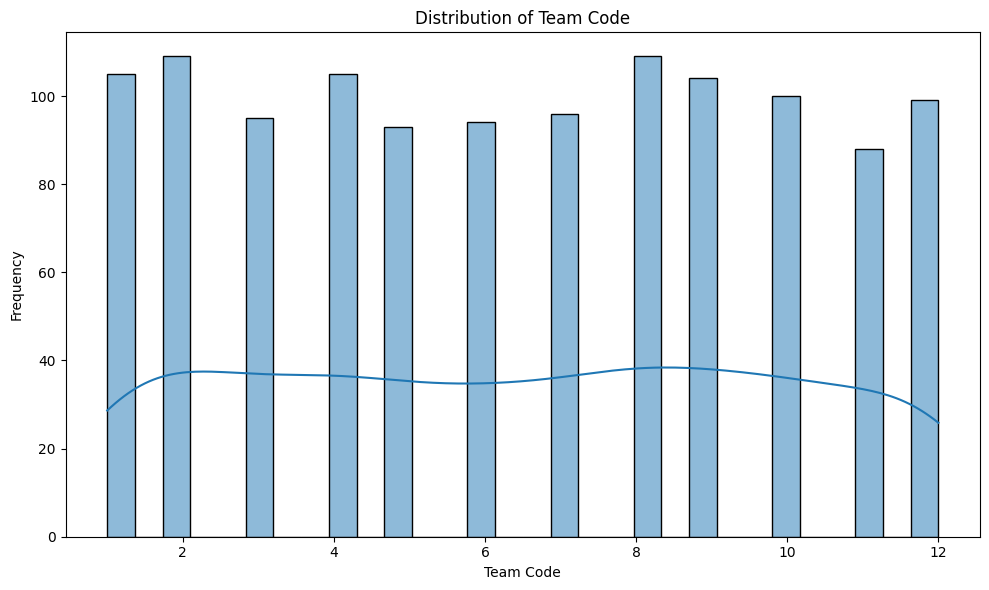

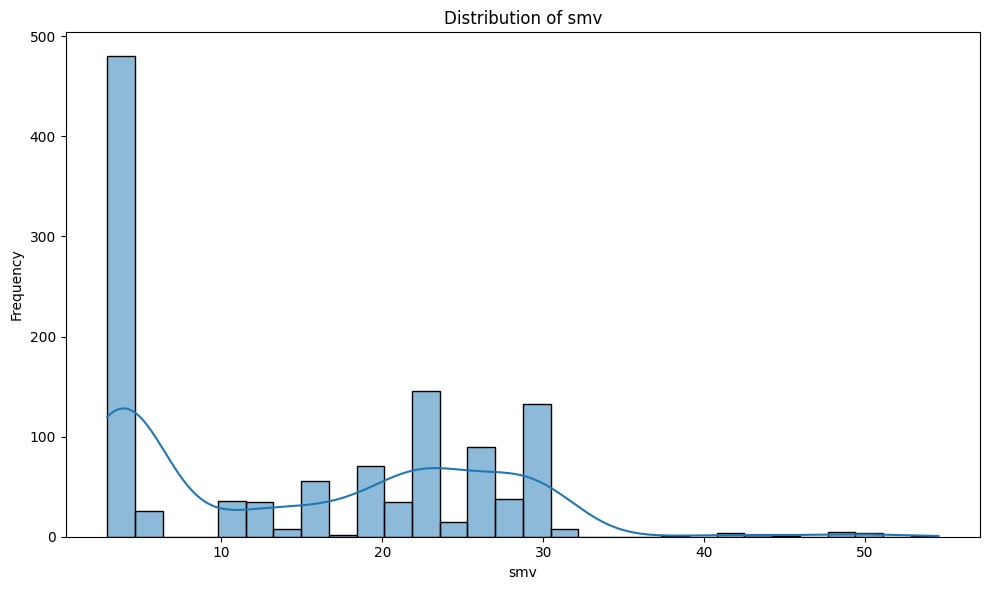

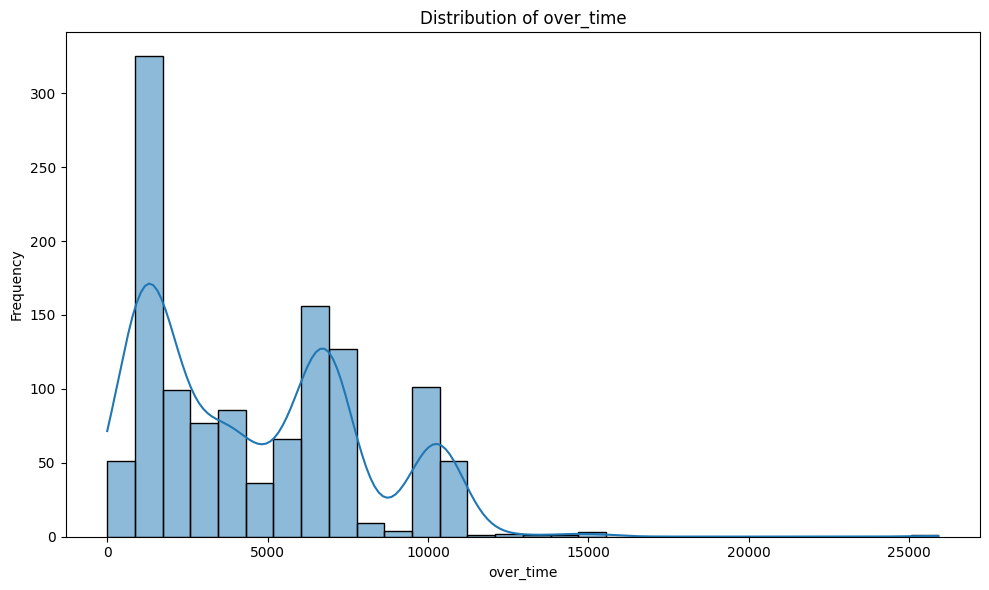

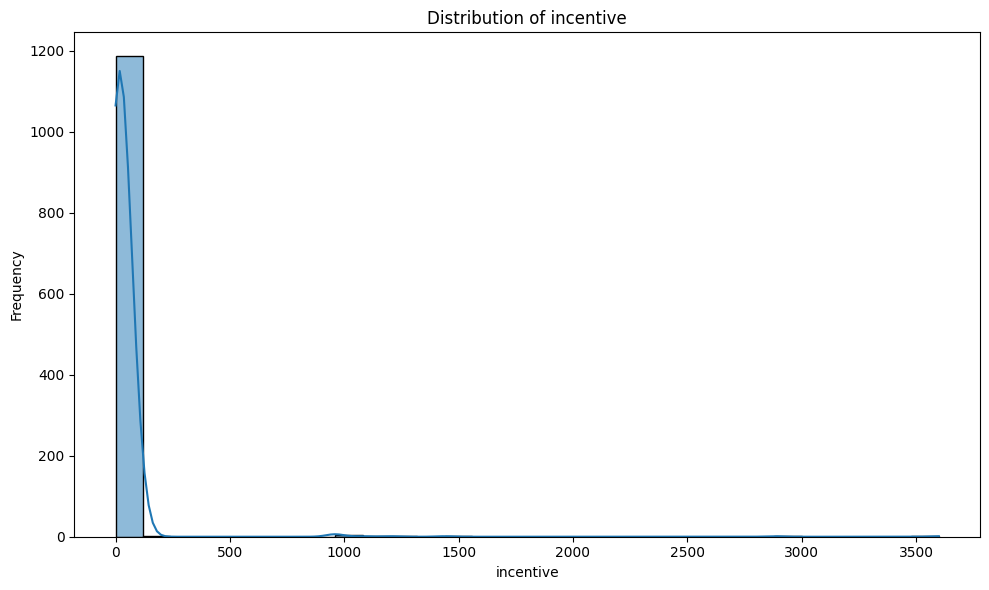

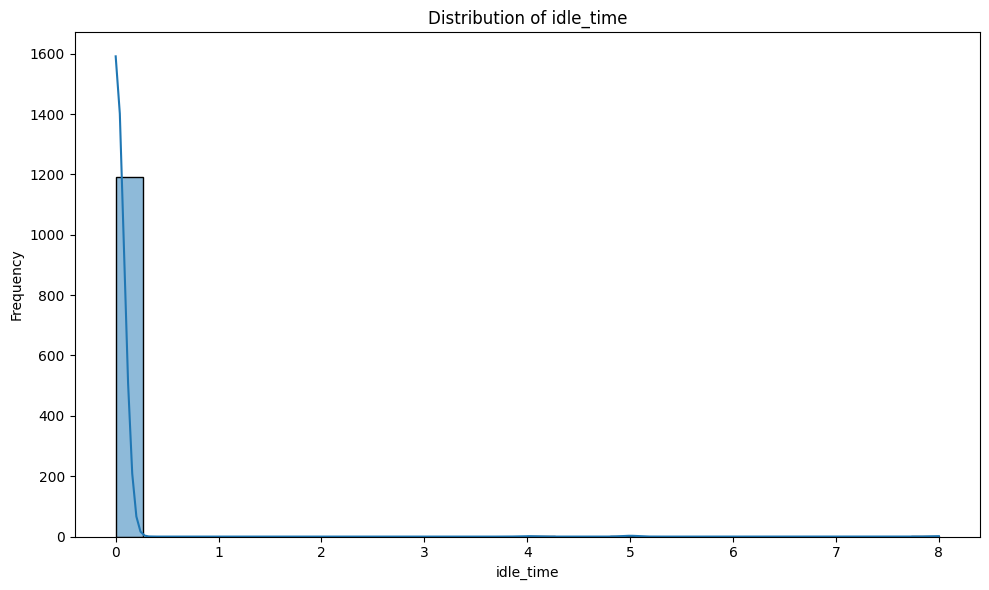

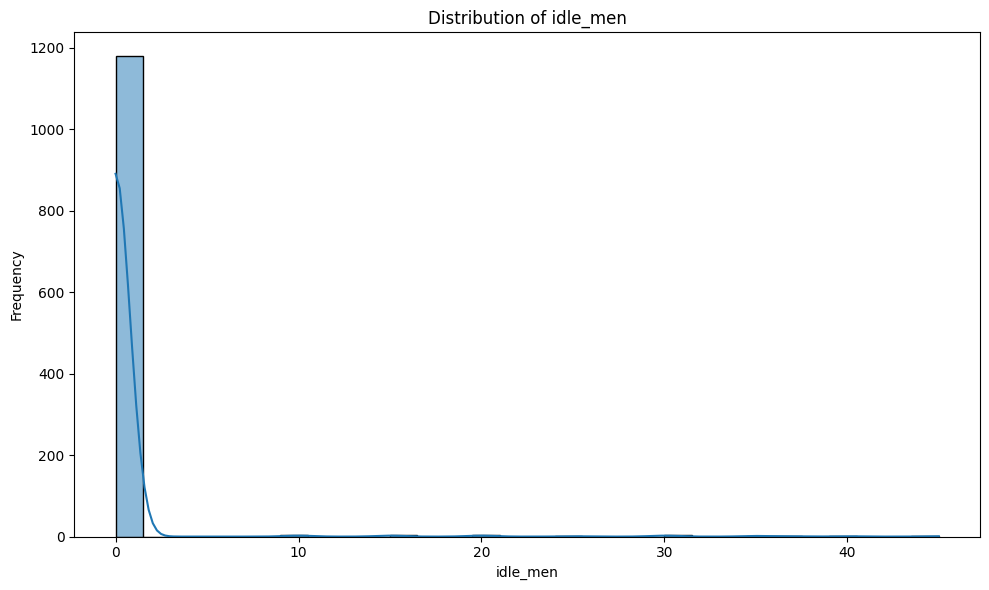

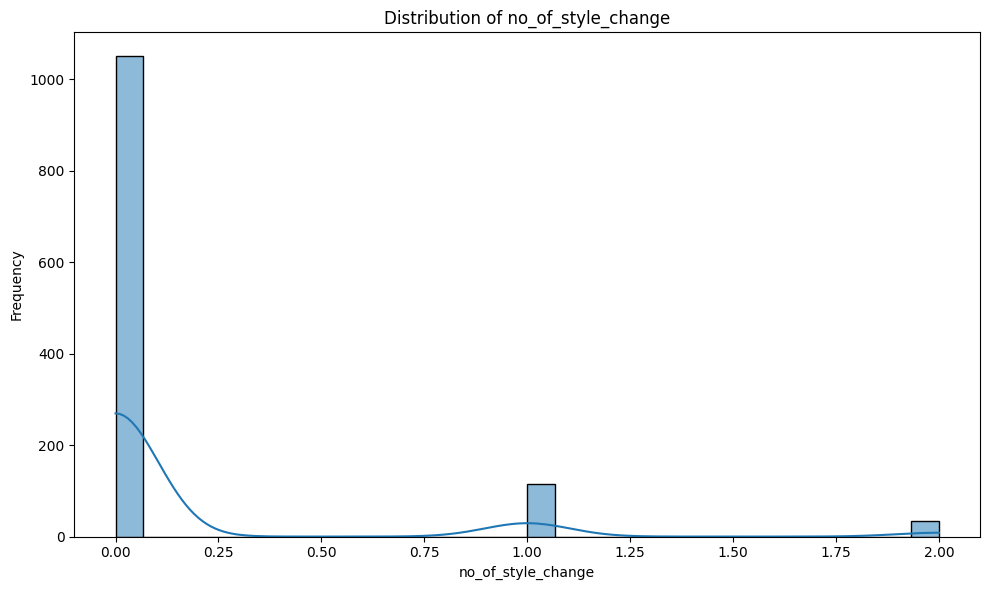

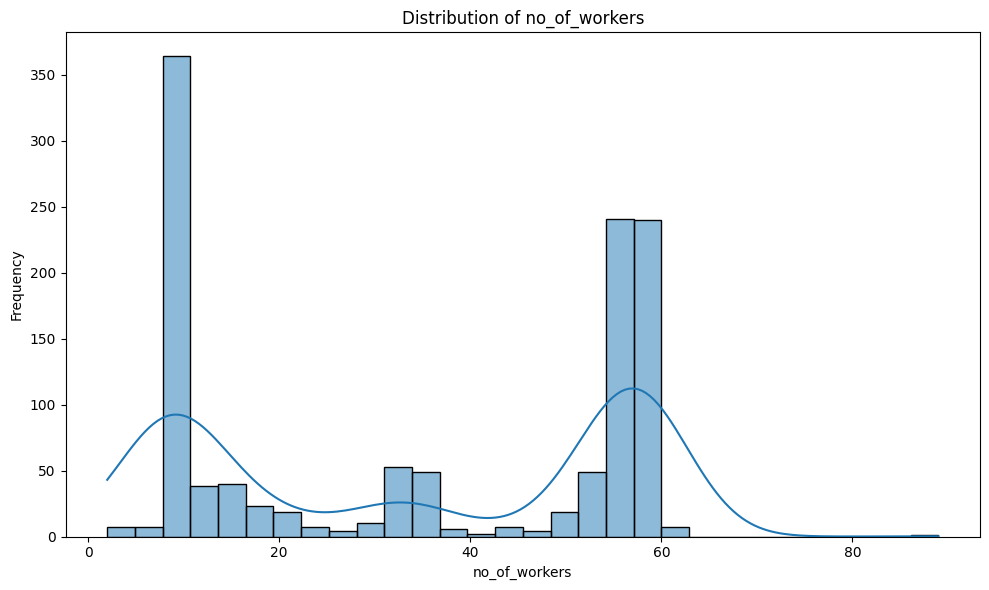

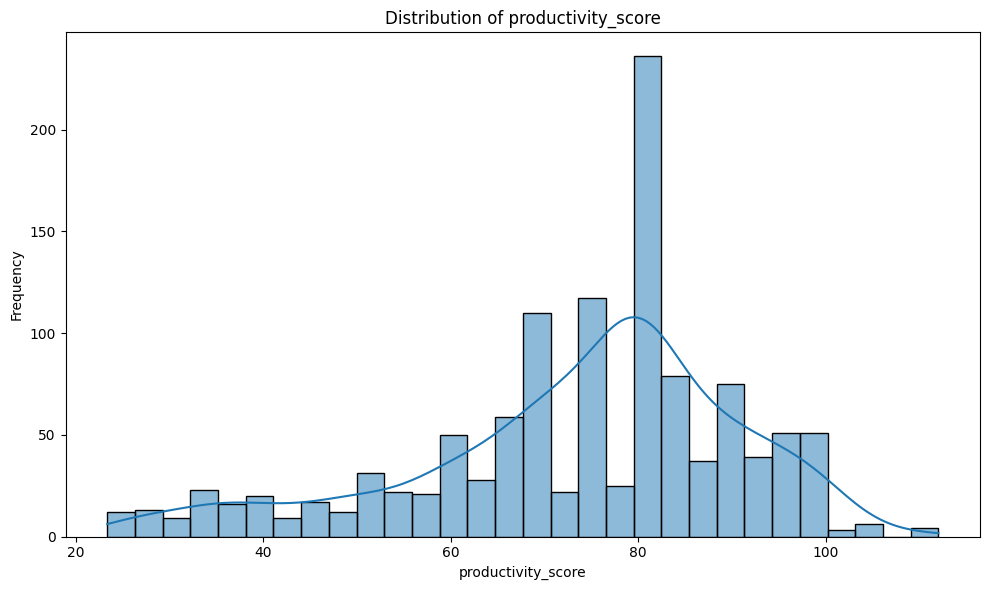

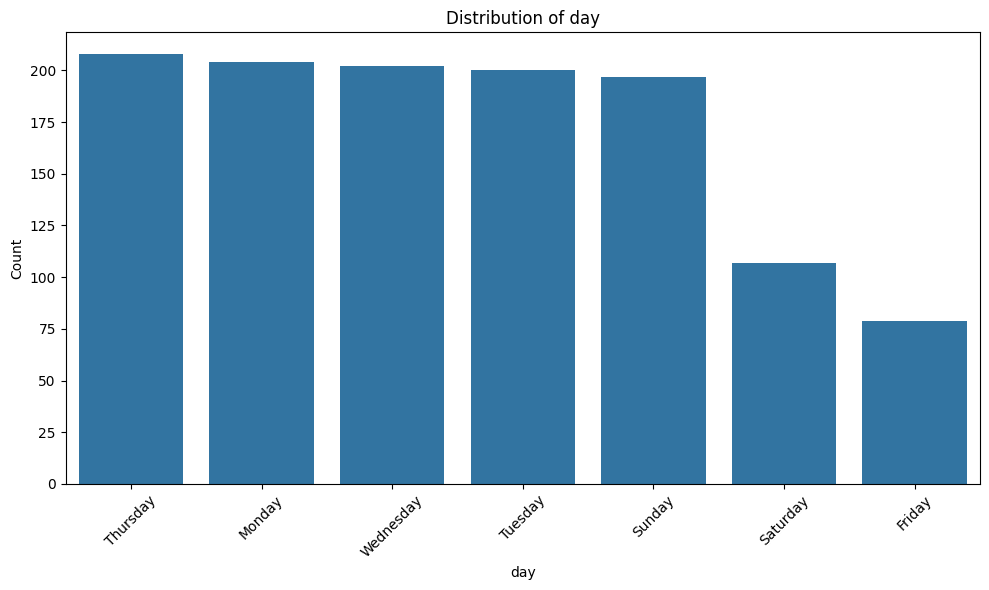

In [189]:
# Check distribution of numerical features
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

# Check distribution of categorical features
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


## **Encode**

because the categorical column is mostly date such as: day and month so lets just use ordinal encode

In [190]:
# one hot encode for day column using OneHotEncode
# Encode 'day' column

ohe_enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
one_hot_encoded = ohe_enc.fit_transform(df[['day']])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=ohe_enc.get_feature_names_out(['day']))
df = pd.concat([df.reset_index(drop=True), one_hot_df], axis=1)
df = df.drop(columns=['day'])

In [191]:
df.head()

,Team Code,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,productivity_score,year,month,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,8,26.16,7080,98,0.0,0,0,59.0,94.073,2015,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,3.94,960,0,0.0,0,0,8.0,88.650,2015,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,11,11.41,3660,50,0.0,0,0,30.5,80.057,2015,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,12,11.41,3660,50,0.0,0,0,30.5,80.057,2015,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,6,25.90,1920,50,0.0,0,0,56.0,80.038,2015,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# **Spliting**

In [192]:
# split dataset
X = df.drop(columns=['productivity_score'])
y = df['productivity_score']

# split 70/30
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# split 30% into 20% test and 10% validation
X_train, X_cv, y_train, y_cv = train_test_split(X_temp, y_temp, test_size=2/3, random_state=42)

## **Scaling**

In [193]:
# because its not normaly distributed, we are gonna split scaling with RobustScaler for all columns
scaler = RobustScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_cv = scaler.transform(X_cv)
X_test = scaler.transform(X_test)

In [194]:
print(X_train)

[[-0.16666667  0.67577413  0.54347826 ...  1.          0.
   0.        ]
 [ 0.         -0.56284153 -0.45652174 ...  0.          0.
   0.        ]
 [ 0.83333333 -0.50591985 -0.55434783 ...  1.          0.
   0.        ]
 ...
 [ 0.16666667  0.4845173   1.125      ...  1.          0.
   0.        ]
 [-0.5        -0.50591985 -0.39130435 ...  0.          0.
   0.        ]
 [ 0.83333333 -0.17531876 -0.09782609 ...  0.          0.
   0.        ]]


# **Base Modelling**

using relu activation to make it looks like graph with minumum number equal to 0

## **Sequential Model**

### **Configure Model Neuron, Activation Layer**

In [195]:
# sequential model
n = X_train.shape[1]
n

base_model_sequential = keras.Sequential([
    layers.Dense(n * 2, activation='relu', input_shape=(n,)),
    layers.Dense(n * 2, activation='relu'),
    layers.Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### **Compile and evaluation**

In [196]:
# compile model
base_model_sequential.compile(
    optimizer='adam', #cara model belajar
    loss='mse', #semakin rendah makin bagus
    metrics=['mae', 'mse', RootMeanSquaredError(name = 'rmse')] #semakin rendah makin bagus
)
base_model_sequential.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_39 (Dense)                │ (None, 34)             │           612 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 34)             │         1,190 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 1)              │            35 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,837 (7.18 KB)

 Trainable params: 1,837 (7.18 KB)

 Non-trainable params: 0 (0.00 B)

### **Fit Model Sequential**

In [197]:
X_train.shape

(279, 17)

In [198]:
callbacks = EarlyStopping(monitor='val_loss',
                           patience=20,
                           restore_best_weights=True)


history = base_model_sequential.fit(
    X_train, y_train,
    validation_data=(X_cv, y_cv),
    epochs=300,
    callbacks = [callbacks],
    batch_size=32,
    verbose=1
)

Epoch 1/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - loss: 5741.5684 - mae: 73.5949 - mse: 5741.5684 - rmse: 75.7715 - val_loss: 5572.6514 - val_mae: 72.5579 - val_mse: 5572.6514 - val_rmse: 74.6502
Epoch 2/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 5596.0308 - mae: 72.8796 - mse: 5596.0308 - rmse: 74.8034 - val_loss: 5528.0601 - val_mae: 72.2423 - val_mse: 5528.0601 - val_rmse: 74.3509
Epoch 3/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 5547.4854 - mae: 72.2370 - mse: 5547.4854 - rmse: 74.4786 - val_loss: 5474.7808 - val_mae: 71.8627 - val_mse: 5474.7808 - val_rmse: 73.9918
Epoch 4/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 5614.9116 - mae: 72.8928 - mse: 5614.9116 - rmse: 74.9279 - val_loss: 5409.1714 - val_mae: 71.3915 - val_mse: 5409.1714 - val_rmse: 73.5471
Epoch 5/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 5693.9712 - mae: 73.5348 - mse: 5693.9712 - rmse: 75.4526 - val_loss: 5326.0801 - val_mae: 70.7896 - val_mse: 5326.0801 - val_rmse: 72.9800
Epoch 6/30

### **Loss Plot**

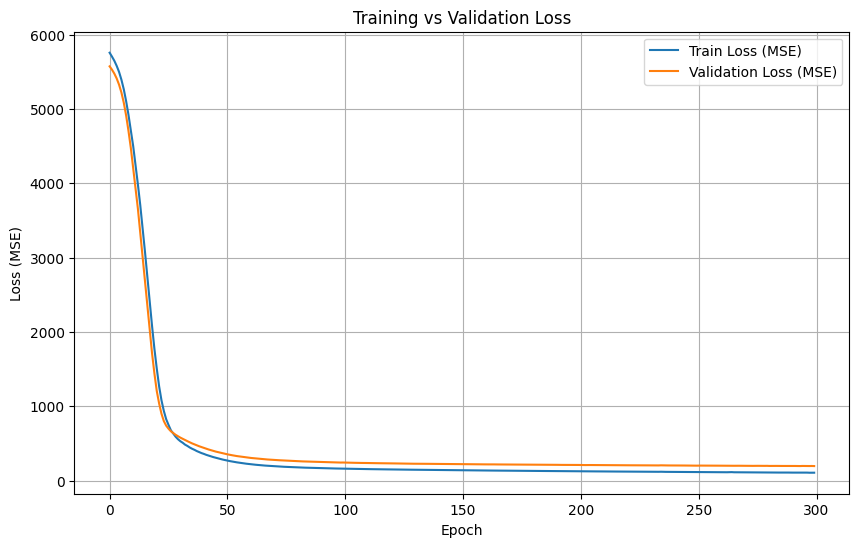

In [199]:
# Plot loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss (MSE)')
plt.plot(history.history['val_loss'], label='Validation Loss (MSE)')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()

### **R2 Model Sequential**

In [200]:
# show R2
y_pred = base_model_sequential.predict(X_test)
r2_score(y_test, y_pred)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


0.2507309708192178

## **Functional Model**

### **Configure Model Neuron, Activation Layer**

In [201]:
input = layers.Input(shape=(n,))
x = Dense(n*3, activation='relu')(input)
x = Dense(n*3, activation='relu')(x)
x = Dense(n*3, activation='relu')(x)
output = Dense(1)(x)

base_model_functional = Model(inputs=input, outputs=output)

### **Compile and evaluation**

In [202]:
base_model_functional.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae', 'mse', RootMeanSquaredError(name='rmse')]
)

base_model_functional.summary()

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)     │ (None, 17)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 51)             │           918 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 51)             │         2,652 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 51)             │         2,652 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 1)              │            52 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,274 (24.51 KB)

 Trainable params: 6,274 (24.51 KB)

 Non-trainable params: 0 (0.00 B)

### **Fit Model Functional**

In [203]:
callbacks = EarlyStopping(monitor='val_loss',
                           patience=20,
                           restore_best_weights=True)

history = base_model_functional.fit(
    X_train, y_train,
    validation_data=(X_cv, y_cv),
    epochs=300,
    callbacks=[callbacks],
    batch_size=32,
    verbose=1
)

Epoch 1/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 5665.6685 - mae: 73.2143 - mse: 5665.6685 - rmse: 75.2622 - val_loss: 5602.1260 - val_mae: 72.7502 - val_mse: 5602.1260 - val_rmse: 74.8474
Epoch 2/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5790.0474 - mae: 74.1380 - mse: 5790.0474 - rmse: 76.0905 - val_loss: 5524.0361 - val_mae: 72.1897 - val_mse: 5524.0361 - val_rmse: 74.3239
Epoch 3/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5740.2944 - mae: 73.5420 - mse: 5740.2944 - rmse: 75.7583 - val_loss: 5410.1069 - val_mae: 71.3573 - val_mse: 5410.1069 - val_rmse: 73.5534
Epoch 4/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5610.1138 - mae: 72.5465 - mse: 5610.1138 - rmse: 74.8923 - val_loss: 5225.5259 - val_mae: 70.0198 - val_mse: 5225.5259 - val_rmse: 72.2878
Epoch 5/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5248.2827 - mae: 70.1817 - mse: 5248.2827 - rmse: 72.4442 - val_loss: 4924.0005 - val_mae: 67.7667 - val_mse: 4924.0005 - val_rmse: 70.1712
Epoch 6/30

### **Loss Plot**

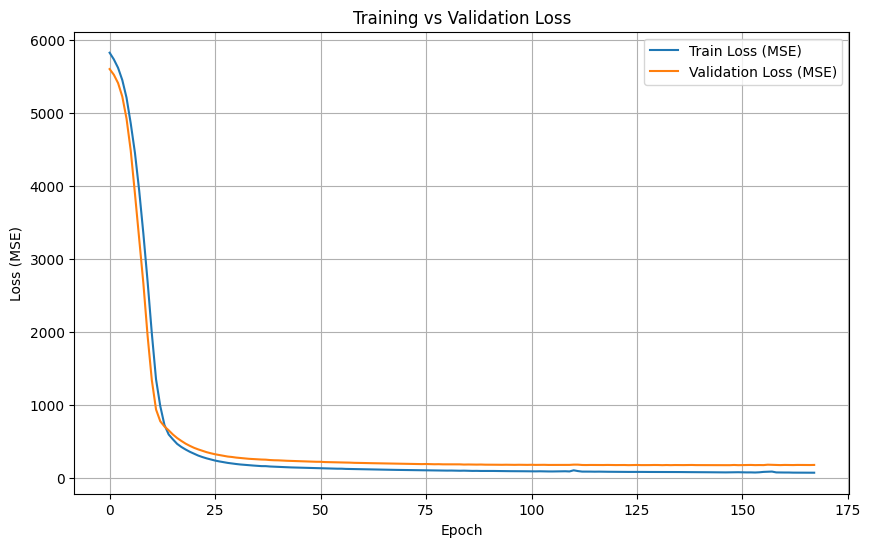

In [204]:
# Plot loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss (MSE)')
plt.plot(history.history['val_loss'], label='Validation Loss (MSE)')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()

### **R2 Model Functional**

In [205]:
# show R2
y_pred = base_model_functional.predict(X_test)
r2_score(y_test, y_pred)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


0.35346509254253955

# **Modify Modelling**

## **Sequential Model**

### **Configure Model Neuron, Activation Layer**

In [206]:
# sequential model
n = X_train.shape[1]
n


modify_model_sequential = keras.Sequential([
    layers.Dense(n * 3, activation= 'relu', input_shape=(n,), kernel_regularizer=regularizers.l2(0.001)),
    #layers.Dropout(0.3), #overfitting kalo crossed, underfitting kalo gap terlalu jauh
    layers.Dense(n * 3, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(n * 3, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### **Compile and evaluation**

In [207]:
optimizer = keras.optimizers.Adam(learning_rate=0.0005)

# compile model
modify_model_sequential.compile(
    optimizer=optimizer, #cara model belajar
    loss='mse', #semakin rendah makin bagus
    metrics=['mae', 'mse', RootMeanSquaredError(name = 'rmse')] #semakin rendah makin bagus
)
modify_model_sequential.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_46 (Dense)                │ (None, 51)             │           918 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 51)             │         2,652 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 51)             │         2,652 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 1)              │            52 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,274 (24.51 KB)

 Trainable params: 6,274 (24.51 KB)

 Non-trainable params: 0 (0.00 B)

### **Fit Model Sequential**

In [208]:
callbacks = EarlyStopping(monitor='val_loss',
                           patience=20,
                           restore_best_weights=True)


history = modify_model_sequential.fit(
    X_train, y_train,
    validation_data=(X_cv, y_cv),
    epochs=300,
    callbacks = [callbacks],
    batch_size=16,
    verbose=1
)

Epoch 1/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 5565.5225 - mae: 72.2573 - mse: 5565.3945 - rmse: 74.5743 - val_loss: 5550.3384 - val_mae: 72.3902 - val_mse: 5550.2109 - val_rmse: 74.4997
Epoch 2/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5715.7729 - mae: 73.5409 - mse: 5715.6450 - rmse: 75.6003 - val_loss: 5450.4282 - val_mae: 71.6710 - val_mse: 5450.3008 - val_rmse: 73.8261
Epoch 3/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5443.9922 - mae: 71.1518 - mse: 5443.8633 - rmse: 73.7642 - val_loss: 5278.3750 - val_mae: 70.4045 - val_mse: 5278.2461 - val_rmse: 72.6515
Epoch 4/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5305.2124 - mae: 70.2018 - mse: 5305.0825 - rmse: 72.8217 - val_loss: 4979.9102 - val_mae: 68.1888 - val_mse: 4979.7788 - val_rmse: 70.5676
Epoch 5/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 5033.7363 - mae: 68.1108 - mse: 5033.6035 - rmse: 70.9094 - val_loss: 4499.1123 - val_mae: 64.4999 - val_mse: 4498.9766 - val_rmse: 67.0744
Ep

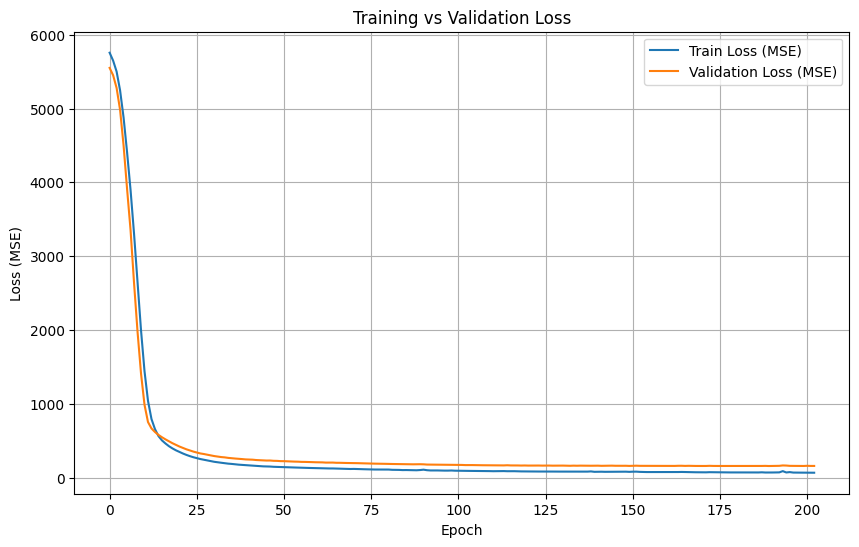

In [209]:
# Plot loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss (MSE)')
plt.plot(history.history['val_loss'], label='Validation Loss (MSE)')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()

### **R2 Model Sequential**

In [210]:
# show R2
y_pred = modify_model_sequential.predict(X_test)
r2_score(y_test, y_pred)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


0.3723925688391976

## **Functional Model**

### **Configure Model Neuron, Activation Layer**

In [211]:
input = layers.Input(shape=(n,))
x = Dense(n*4, activation='relu', kernel_regularizer=regularizers.l2(0.001))(input)
x = Dense(n*4, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
x = Dense(n*4, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
x = Dense(n*4, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
output = Dense(1)(x)

modify_model_functional = Model(inputs=input, outputs=output)

### **Compile and evaluation**

In [212]:
optimizer = keras.optimizers.Adam(learning_rate=0.0005)

# compile model
modify_model_functional.compile(
    optimizer=optimizer, #cara model belajar
    loss='mse', #semakin rendah makin bagus
    metrics=['mae', 'mse', RootMeanSquaredError(name = 'rmse')] #semakin rendah makin bagus
)
modify_model_functional.summary()

Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)     │ (None, 17)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 68)             │         1,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 68)             │         4,692 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 68)             │         4,692 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 68)             │         4,692 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 1)              │            69 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,369 (60.04 KB)

 Trainable params: 15,369 (60.04 KB)

 Non-trainable params: 0 (0.00 B)

### **Fit Model Functional**

In [213]:
callbacks = EarlyStopping(monitor='val_loss',
                           patience=20,
                           restore_best_weights=True)

history = modify_model_functional.fit(
    X_train, y_train,
    validation_data=(X_cv, y_cv),
    epochs=300,
    callbacks=[callbacks],
    batch_size=16,
    verbose=1
)

Epoch 1/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - loss: 5745.7656 - mae: 73.6576 - mse: 5745.5386 - rmse: 75.7969 - val_loss: 5511.7808 - val_mae: 72.1238 - val_mse: 5511.5552 - val_rmse: 74.2398
Epoch 2/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 5394.2905 - mae: 71.2965 - mse: 5394.0649 - rmse: 73.4357 - val_loss: 5229.9194 - val_mae: 70.0652 - val_mse: 5229.6919 - val_rmse: 72.3166
Epoch 3/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5309.6055 - mae: 70.3906 - mse: 5309.3784 - rmse: 72.8470 - val_loss: 4530.1445 - val_mae: 64.7616 - val_mse: 4529.9150 - val_rmse: 67.3046
Epoch 4/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4611.1235 - mae: 64.5340 - mse: 4610.8936 - rmse: 67.8959 - val_loss: 3681.5613 - val_mae: 57.8044 - val_mse: 3681.3301 - val_rmse: 60.6740
Epoch 5/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3832.4014 - mae: 57.4060 - mse: 3832.1694 - rmse: 61.8247 - val_loss: 3078.5330 - val_mae: 52.0816 - val_mse: 3078.2983 - val_rmse: 55.4824


### **Loss Plot**

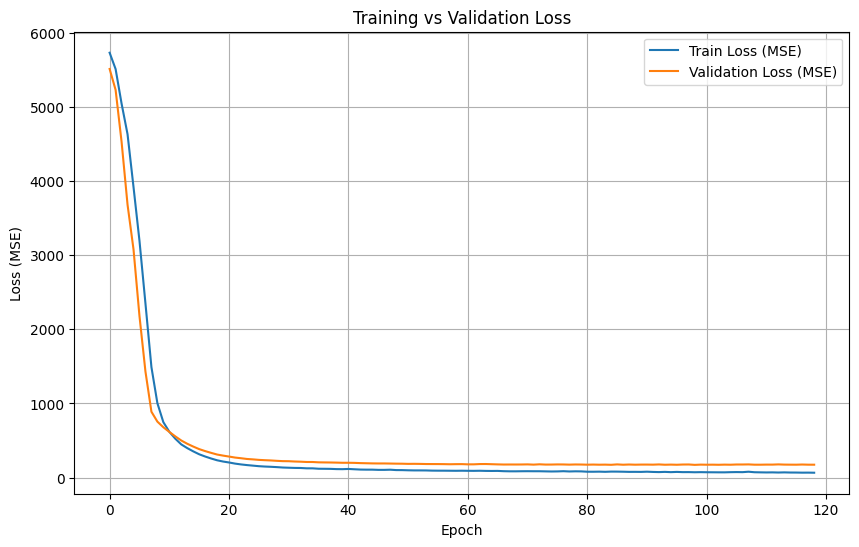

In [214]:
# Plot loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss (MSE)')
plt.plot(history.history['val_loss'], label='Validation Loss (MSE)')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()

### **R2 Model Functional**

In [215]:
# show R2
y_pred = modify_model_functional.predict(X_test)
r2_score(y_test, y_pred)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


0.36435334781635953

# **Final Compare**




In [223]:
print("Base Model Sequential")
y_pred = base_model_sequential.predict(X_test)
print(r2_score(y_test, y_pred))

print("\nModify Model Sequential")
y_pred = modify_model_sequential.predict(X_test)
print(r2_score(y_test, y_pred))

print("\nBase Model Functional")
y_pred = base_model_functional.predict(X_test)
print(r2_score(y_test, y_pred))

print("\nModify Model Functional")
y_pred = modify_model_functional.predict(X_test)
print(r2_score(y_test, y_pred))

Base Model Sequential
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
0.2507309708192178

Modify Model Sequential
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
0.3723925688391976

Base Model Functional
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
0.35346509254253955

Modify Model Functional
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
0.36435334781635953


In [ ]:
def evaluate_model(model, X_test, y_test, model_name):
    print(f"\n{model_name}")
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    print(f"R² Score: {r2:.4f}")
    print(f"MAE     : {mae:.4f}")
    print(f"RMSE    : {rmse:.4f}")

# Evaluate each model
evaluate_model(base_model_sequential, X_test, y_test, "Base Model Sequential")
evaluate_model(modify_model_sequential, X_test, y_test, "Modify Model Sequential")
evaluate_model(base_model_functional, X_test, y_test, "Base Model Functional")
evaluate_model(modify_model_functional, X_test, y_test, "Modify Model Functional")



Base Model Sequential
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
R² Score: 0.2507
MAE     : 11.2833
RMSE    : 15.0116

Modify Model Sequential
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
R² Score: 0.3724
MAE     : 10.0156
RMSE    : 13.7389

Base Model Functional
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
R² Score: 0.3535
MAE     : 10.2416
RMSE    : 13.9445

Modify Model Functional
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
R² Score: 0.3644
MAE     : 10.0701
RMSE    : 13.8266


from the evaluation results, the modified sequential model has the best evaluation from the other models with R² score of 0.3724, with 37% of the variance, and lowest MAE which is 10.0156, both based and modified for functional models perform better than base sequential model.